## Setup

In [1]:
!pip install swifter neuralprophet plotly kaleido

In [2]:
import pandas as pd
import numpy as np
import typing
import matplotlib.pyplot as plt
import swifter
import dateutil
import datetime
import kaleido
import plotly

from neuralprophet import NeuralProphet

Matplotlib created a temporary cache directory at /tmp/matplotlib-5ppx1upf because the default path (/opt/spark/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


## Data preparation

### Loading data

In [3]:
df_tribunal = pd.read_csv('dados/serie_temporal_ajuizamento-TJRN_G1_2018.csv', header='infer', sep=';')
print(df_tribunal.head(2))
#df_tribunal['data_ajuizamento'] = df_tribunal['data_ajuizamento'].swifter.apply(dateutil.parser.parse)
#df_tribunal['data_ajuizamento'] = df_tribunal['data_ajuizamento'].swifter.apply(datetime.datetime.date)


   Unnamed: 0  numero_processo tribunal  classe_codigo data_ajuizamento  \
0           0     1.002679e+18     TJRN            261       2018-04-23   
1           1     1.004497e+18     TJRN            279       2019-06-20   

   codigo_orgaoJulgador grau  
0                  5981   G1  
1                  5966   G1  


In [4]:
df_tribunal = df_tribunal[df_tribunal['data_ajuizamento'] < '2025-01-01']

In [5]:
dataframe = df_tribunal.groupby(['data_ajuizamento']).size()
df_tribunal = dataframe.to_frame(name='quantidade')
df_tribunal = df_tribunal.rename_axis('data_ajuizamento').reset_index()
print(df_tribunal)

     data_ajuizamento  quantidade
0          2018-01-01           8
1          2018-01-02          73
2          2018-01-03          82
3          2018-01-04         122
4          2018-01-05          12
...               ...         ...
2310       2024-05-03         320
2311       2024-05-04          91
2312       2024-05-05          51
2313       2024-05-06         559
2314       2024-05-07         383

[2315 rows x 2 columns]


In [6]:
#df_tribunal['data_ajuizamento'] = pd.to_datetime(df_tribunal['data_ajuizamento'])

### Data visualization

Série Temporal dos ajuizamentos ao longo do tempo

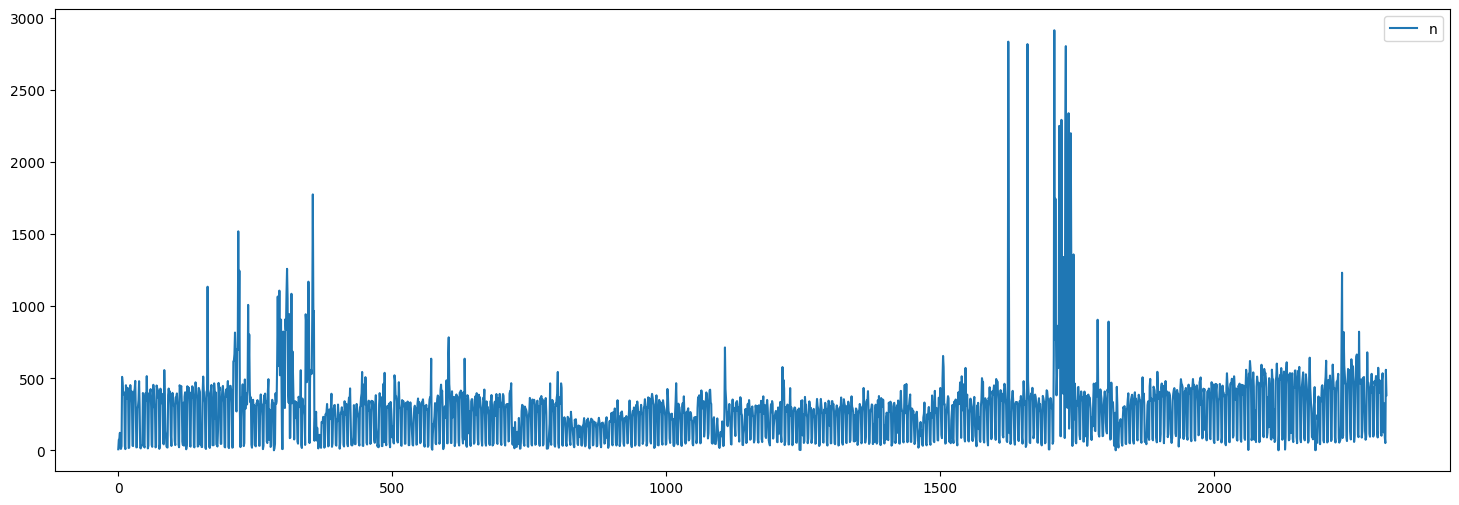

In [7]:
plt.figure(figsize=(18, 6))
plt.plot(df_tribunal['quantidade'])
plt.legend('número de ajuizamentos')

## NeuralProphet

In [8]:
dados = pd.DataFrame()
dados['ds'] = df_tribunal['data_ajuizamento']
dados['y'] = df_tribunal['quantidade']

In [9]:
dados.to_csv('dados/neural_prophet_TJRN_G1_2018.csv', header=True, sep=';', index=False)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.827% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.data.processing._handle_missing_data) - Added 4 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 4 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 4 NaN values in column y were auto-imputed.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.943% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as on

Finding best initial lr:   0%|          | 0/231 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.827% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.827% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.data.processing._handle_missing_data) - Added 4 missing dates.
WARNING - (NP.data.processing._handle_missing_data) - 4 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 4 NaN values in column y were auto-imputed.


Predicting: 54it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


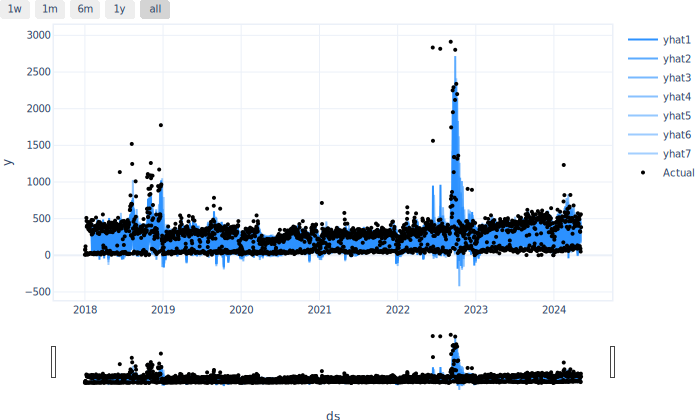

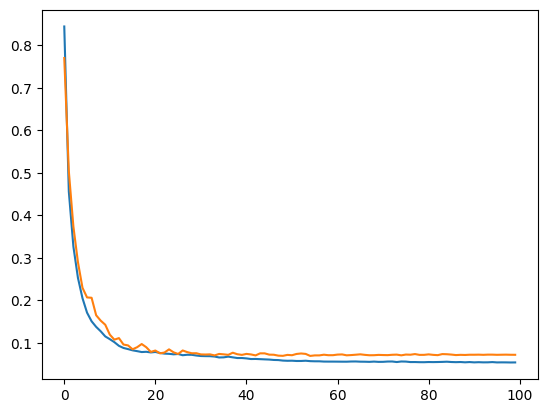

In [10]:
dados = pd.read_csv('dados/neural_prophet_TJRN_G1_2018.csv', header='infer', sep=';')
#dados = dados[dados.y < 6000]
m = NeuralProphet(n_lags=30, n_forecasts=7, ar_layers=(16, 64))
m = m.add_country_holidays("BR")
m.set_plotting_backend("plotly-static")
df_train, df_val = m.split_df(dados, valid_p=0.25)
metrics = m.fit(df_train, validation_df=df_val, freq='D', progress="plot")
forecast = m.predict(dados)
m.plot(forecast)

In [11]:
m.plot_components(forecast)

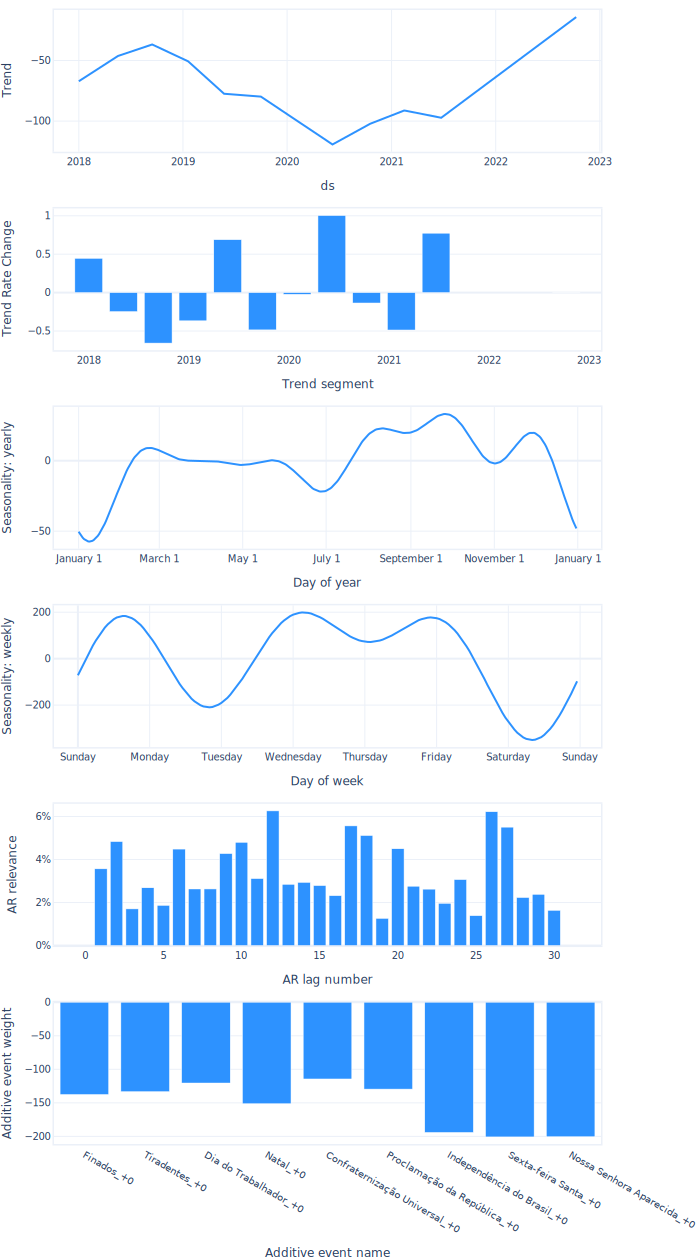

In [12]:
m.plot_parameters()

In [13]:
print(metrics.tail(5))

      MAE_val    RMSE_val  Loss_val  RegLoss_val  epoch        MAE  \
95  82.236885  121.026459  0.071502          0.0     95  75.171005   
96  82.430931  121.207237  0.071712          0.0     96  75.323807   
97  82.565613  121.329956  0.071888          0.0     97  75.321205   
98  82.329697  121.101448  0.071604          0.0     98  74.976875   
99  82.261871  121.054741  0.071536          0.0     99  75.224945   

          RMSE      Loss  RegLoss  
95  165.614914  0.053595      0.0  
96  163.553421  0.053739      0.0  
97  161.875092  0.053670      0.0  
98  159.439957  0.053455      0.0  
99  161.670410  0.053566      0.0  


In [15]:
print(dados['y'].describe())

count    2315.000000
mean      278.441469
std       242.990138
min         1.000000
25%        80.000000
50%       289.000000
75%       376.000000
max      2913.000000
Name: y, dtype: float64


## Prophet

In [17]:
recesso_judiciario = pd.DataFrame({
  'holiday': 'recesso_judiciario',
  'ds': pd.to_datetime(['2018-12-19', '2019-12-19', 
                        '2020-12-19', '2021-12-19',
                        '2022-12-19', '2023-12-19',
                        '2024-12-19', '2025-12-19']),
  'lower_window': 0,
  'upper_window': 18,
})

In [26]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import itertools

m = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.01,interval_width=0.99, holidays=recesso_judiciario)
m.add_country_holidays(country_name='BR')
m.fit(dados)
df_cv = cross_validation(m, initial='1080 days', period='60 days', horizon = '180 days', parallel="processes")

df_p = performance_metrics(df_cv)
df_p.head(5)

02:15:01 - cmdstanpy - INFO - Chain [1] start processing
02:15:02 - cmdstanpy - INFO - Chain [1] done processing
02:15:02 - cmdstanpy - INFO - Chain [1] start processing
02:15:02 - cmdstanpy - INFO - Chain [1] start processing
02:15:02 - cmdstanpy - INFO - Chain [1] start processing
02:15:02 - cmdstanpy - INFO - Chain [1] start processing
02:15:02 - cmdstanpy - INFO - Chain [1] start processing
02:15:03 - cmdstanpy - INFO - Chain [1] start processing
02:15:03 - cmdstanpy - INFO - Chain [1] start processing
02:15:03 - cmdstanpy - INFO - Chain [1] start processing
02:15:03 - cmdstanpy - INFO - Chain [1] start processing
02:15:03 - cmdstanpy - INFO - Chain [1] start processing
02:15:03 - cmdstanpy - INFO - Chain [1] start processing
02:15:03 - cmdstanpy - INFO - Chain [1] start processing
02:15:03 - cmdstanpy - INFO - Chain [1] done processing
02:15:04 - cmdstanpy - INFO - Chain [1] done processing
02:15:04 - cmdstanpy - INFO - Chain [1] done processing
02:15:04 - cmdstanpy - INFO - Chain

horizon           mse        rmse         mae      mape     mdape     smape  \
0 18 days  86171.487540  293.549804  118.169108  0.774799  0.215080  0.390711   
1 19 days  78944.897972  280.971347  115.305542  0.772020  0.227550  0.388589   
2 20 days  63563.336026  252.117703  110.163590  0.778096  0.236875  0.388404   
3 21 days  71970.937750  268.273998  116.289926  0.783877  0.249062  0.394353   
4 22 days  66048.513688  256.999054  114.820040  0.762497  0.249678  0.394742   

   coverage  
0  0.969289  
1  0.972395  
2  0.975155  
3  0.972395  
4  0.972395

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_72119/481289654.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




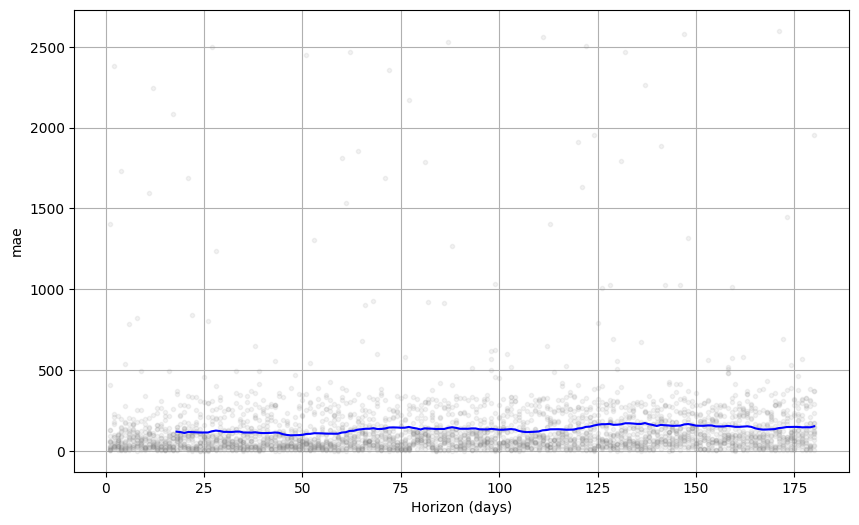

In [27]:
fig = plot_cross_validation_metric(df_cv, metric='mae')
fig.show()